In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()    # 주사위 1번 굴림

tensor([0., 1., 0., 0., 0., 0.])

In [6]:
multinomial.Multinomial(10, fair_probs).sample()    # 주사위 10번 굴림

tensor([0., 2., 1., 2., 2., 3.])

In [12]:
counts = multinomial.Multinomial(1000, fair_probs).sample()    # 주사위 6000번 굴림

In [13]:
counts / 1000    # 모두 1/6 가까이 수렴

tensor([0.1630, 0.1540, 0.1710, 0.1730, 0.1730, 0.1660])

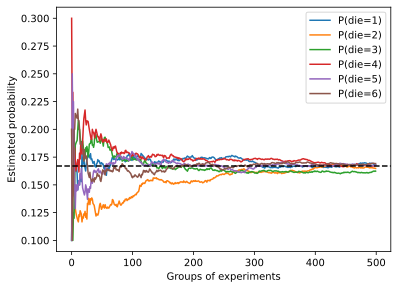

In [14]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();